In [499]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [500]:
# load dataset
df = pd.read_excel('data/CaseStudy_20190517.xlsx')

In [501]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,5578513,4.605170,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,...,2016-11-15,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,10009,1.0,1.0
2,17423675,5.010635,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.5,Real Bed,strict,True,...,2016-11-18,33.875862,-118.403293,Sand Section Beach Bungalow,Hermosa Beach,29,97.0,90254,2.0,2.0
3,14066228,4.248495,Apartment,Private room,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",2,1.0,Real Bed,flexible,True,...,NaT,33.813228,-118.389434,Beach Pad 1 min walk to the ocean!,Torrance,0,NaN,90277,1.0,1.0
4,583490,4.955827,Apartment,Entire home/apt,"{Kitchen,Heating,""Smoke detector"",""Carbon mono...",2,1.0,Real Bed,strict,True,...,2017-04-06,33.778526,-118.145926,VINTAGE 1930s Mediteranian Apt. (NOT a party S...,NaN,2,100.0,90804,1.0,1.0


In [502]:
df.shape

(36795, 27)

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36795 entries, 0 to 36794
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36795 non-null  int64         
 1   log_price             36795 non-null  float64       
 2   property_type         36795 non-null  object        
 3   room_type             36795 non-null  object        
 4   amenities             36795 non-null  object        
 5   accommodates          36795 non-null  int64         
 6   bathrooms             36657 non-null  float64       
 7   bed_type              36795 non-null  object        
 8   cancellation_policy   36795 non-null  object        
 9   cleaning_fee          36795 non-null  bool          
 10  city                  36795 non-null  object        
 11  description           36774 non-null  object        
 12  first_review          28564 non-null  datetime64[ns]
 13  host_has_profile

In [504]:
# convert protopype column into numerical column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

## apartment = 0 and home = 1
df['property_type'] = label_encoder.fit_transform(df['property_type'])
df['cleaning_fee'] = label_encoder.fit_transform(df['cleaning_fee'])

In [505]:
display(df['room_type'].unique())
display(df['bed_type'].unique())
display(df['cancellation_policy'].unique())
display(df['cleaning_fee'].unique())

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed'],
      dtype=object)

array(['strict', 'flexible', 'moderate'], dtype=object)

array([1, 0], dtype=int64)

In [506]:
room_type_map = {'Entire home/apt':1 ,'Private room':2,'Shared room':3}
bed_type_map = {'Real Bed': 1,'Futon':2,'Pull-out Sofa':3,'Couch':4,'Airbed':5 }
cancellation_map = {'strict':1,'flexible':2,'moderate':3}

In [507]:
df['room_type'] = df['room_type'].map(room_type_map)
df['bed_type'] = df['bed_type'].map(bed_type_map)
df['cancellation_policy'] = df['cancellation_policy'].map(cancellation_map)

In [508]:
df[['city', 'description', 'first_review',
       'host_has_profile_pic', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode',
       'bedrooms', 'beds']].head(3)

,city,description,first_review,host_has_profile_pic,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,1.0,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,NYC,This is a bright bedroom in an historic buildi...,2013-04-28,1.0,1.0,2013-03-27,f,2016-11-15,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,10009,1.0,1.0
2,LA,"A 1044 sq. ft., 1950's beach house. 3 Blocks f...",2015-07-02,1.0,1.0,2015-06-11,f,2016-11-18,33.875862,-118.403293,Sand Section Beach Bungalow,Hermosa Beach,29,97.0,90254,2.0,2.0


In [509]:
display(df['city'].unique())
display(df['instant_bookable'].unique())

city_map = {'NYC':1,'LA':2}
df['city'] = df['city'].map(city_map)

array(['NYC', 'LA'], dtype=object)

array(['f'], dtype=object)

In [510]:
# single only value with instant_bookable column remove it

df.drop(['instant_bookable'],axis=1,inplace = True)

In [511]:
## select numerical columns
non_object_columns = df.select_dtypes(exclude=['object'])

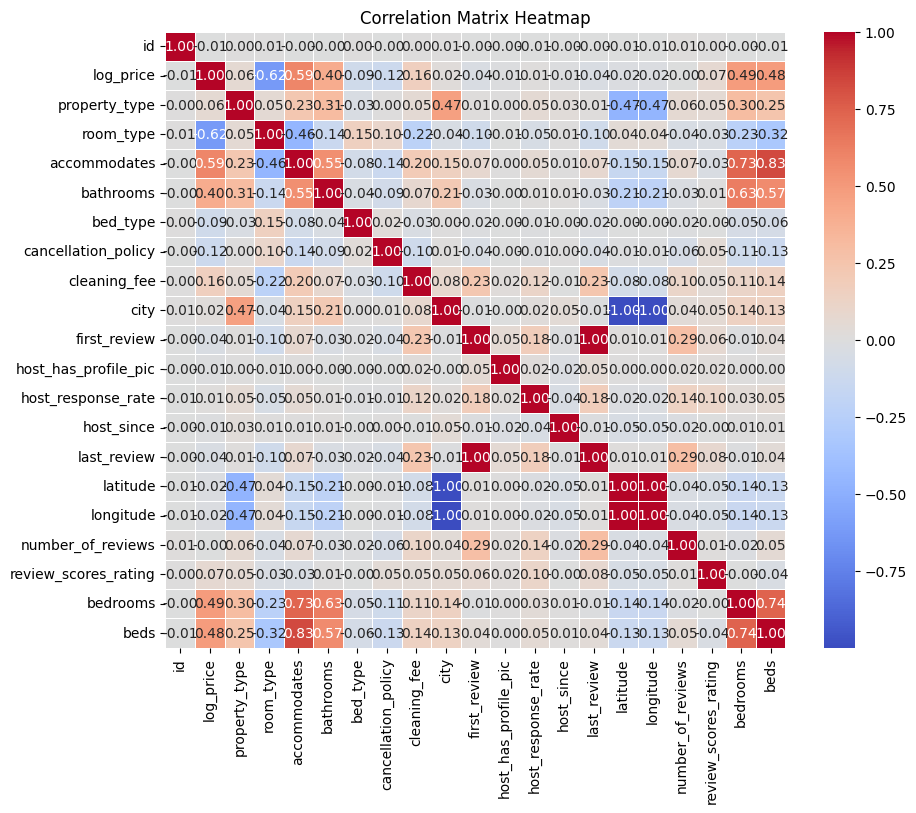

In [512]:
# numerical column relations
correlation_matrix = non_object_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [513]:
df.isnull().sum()

id                          0
log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                 138
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                21
first_review             8231
host_has_profile_pic      127
host_response_rate      11128
host_since                127
last_review              8206
latitude                    0
longitude                   0
name                        1
neighbourhood            3281
number_of_reviews           0
review_scores_rating     8715
zipcode                   524
bedrooms                   55
beds                       72
dtype: int64

In [514]:
new_df = df
new_df.drop('host_response_rate',axis=1,inplace=True)

In [515]:
new_df.drop(['first_review','last_review','host_since','amenities','name','description','neighbourhood','zipcode'],axis=1,inplace=True)

In [516]:
new_df.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257,5.010635,0,1,3,1.0,1,1,1,1,1.0,40.696524,-73.991617,2,100.0,1.0,1.0
1,5578513,4.605170,0,2,2,1.0,1,1,1,1,1.0,40.723883,-73.983880,82,93.0,1.0,1.0
2,17423675,5.010635,1,1,4,1.5,1,1,1,2,1.0,33.875862,-118.403293,29,97.0,2.0,2.0
3,14066228,4.248495,0,2,2,1.0,1,2,1,2,1.0,33.813228,-118.389434,0,NaN,1.0,1.0
4,583490,4.955827,0,1,2,1.0,1,1,1,2,1.0,33.778526,-118.145926,2,100.0,1.0,1.0


In [517]:
# new_df['amenities'] = new_df['amenities'].apply(lambda x: set(x.strip('{}').split(',')))

In [518]:
# all_amenities = set.union(*new_df['amenities'])
# for amenity in all_amenities:
#     new_df[amenity] = new_df['amenities'].apply(lambda x: 1 if amenity in x else 0)

In [519]:
# new_df.drop('amenities',axis=1,inplace=True)

In [520]:
# # new_df['description'] = new_df['description'].str.lower().replace('[^a-zA-Z0-9\s]', '', regex=True)
# # # new_df['name'] = new_df['name'].str.lower().replace('[^a-zA-Z0-9\s]', '', regex=True)
# new_df['neighbourhood'] = new_df['neighbourhood'].str.lower().replace('[^a-zA-Z0-9\s]', '', regex=True)

In [521]:
X = new_df.drop('log_price',axis=1)
y = new_df['log_price']

In [522]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns
categorical_cols


Index([], dtype='object')

In [523]:
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OneHotEncoder # onehotencoding
from sklearn.impute import SimpleImputer ## HAndling Missing Values
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [524]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehotencoder',OneHotEncoder(handle_unknown = 'ignore')),
    ('scaler',StandardScaler(with_mean=False))
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [525]:
## Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [526]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [527]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [528]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [529]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [530]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 0.43975348260256225
MAE: 0.3320552526856489
R2 score 58.768831087431295


Lasso
Model Training Performance
RMSE: 0.6848516155179504
MAE: 0.5385844253806373
R2 score -9.539541778735838e-06


Ridge
Model Training Performance
RMSE: 0.44977150489268236
MAE: 0.3409840566344438
R2 score 56.868859011048045


Elasticnet
Model Training Performance
RMSE: 0.6848516155179504
MAE: 0.5385844253806373
R2 score -9.539541778735838e-06


